In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Part 1: Linear Regression with Gradient Descent

First we are going to fit a line to points using linear regression, which is perhaps the simplest "machine learning" model.

The basic idea is to minimize the "cost function" between a predicted and observed values for a given data set. The example from week one is predicting the profits of a food truck based on the population of the city in which it is located. The cost function here is similar to the Chi^2 we know and love:
![cost](img/cost1.png)
Where x is the vector of m city populations, y is the vector of  h(x) is:
![h](img/h1.png)
In this case a straight line. 

Note that a straight line has two parameters, the slope and offset, the latter is considered the "bias" term. The input data is a list of m city populations, a mx1 vector, thus to multiply it by theta we must create a mx2 vector where the first column is all 1s, call this x'. In this framework h_theta(x') gives the predicted price for a given theta vector, (theta_0,theta_1). 

Now we define the cost function in python:

In [6]:
def h1(theta,x):
    return np.sum(theta*x.transpose(),axis=1)

def ex1_cost(theta,x,y):
    h = h1(theta,x) 
    return (1./(2.*float(len(y))))*np.sum((h-y)*(h-y))

Gradient descent is a method of iteratively updating the values of the parameters of theta based on the partial derivative of the cost function with respect to each parameter. The update rule in this case is given by:
![up](img/update1.png)
where alpha is the "learning rate"

Now we define the update rule in python:

In [7]:
def one_iter(theta,x,y,alpha=0.01):
    theta -= (alpha/float(len(y)))*np.sum((np.sum(theta*x.transpose(),axis=1)-y)*x,axis=1)

Now we'll load in the data and run our gradient decent to optimize theta:

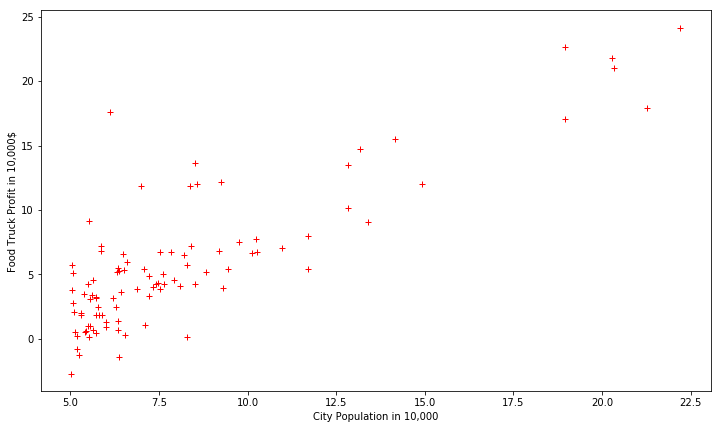

In [18]:
data = np.loadtxt('./ex1data1.txt',float,delimiter=',')
x,y  = data[:,0],data[:,1]

# ADDING THE COLUMN OF 1s TO X:
x = np.array([x*0.+1.,x])

F  = plt.figure(figsize=(12,7))
ax = F.add_subplot(111)
ax.plot(x[1,:],y,'r+')
ax.set_xlabel('City Population in 10,000')
ax.set_ylabel('Food Truck Profit in 10,000$')
plt.show()

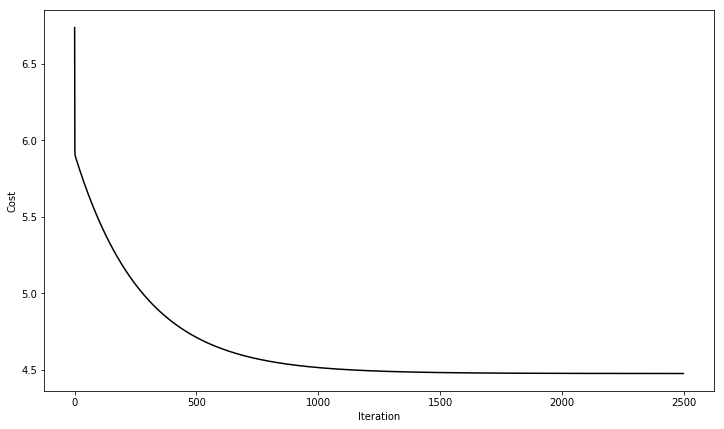

Optimal Theta = [-3.85208068  1.18864349]


In [17]:
# INITIALISE THETA TO (0,0):
T = np.array([0.,0.])

# SPECIFY THE NUMBER OF ITERATIONS
# AND CREATE EMPTY LIST TO TRACK COSTS:
n_iter = 2500
iters  = np.arange(0.,n_iter,1.)
costs  = np.zeros(n_iter)

# ITERATE THETA n_iter TIMES:
for i in range(n_iter):
    one_iter(T,x,y)
    costs[i] = ex1_cost(T,x,y)
    
F = plt.figure(figsize=(12,7))
ax= F.add_subplot(111)
ax.plot(iters,costs,'k-')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
plt.show()

print(f'Optimal Theta = {T}')

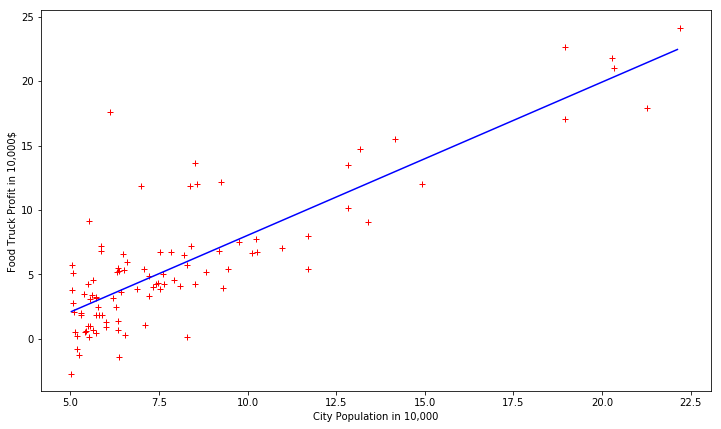

In [16]:
# SHOW OPTIMAL THETA AS A LINE:
xpred = np.arange(np.min(data[:,0]),np.max(data[:,0]),0.1)
ypred = T[0]+xpred*T[1]

F  = plt.figure(figsize=(12,7))
ax = F.add_subplot(111)
ax.plot(x[1,:],y,'r+')
ax.plot(xpred,ypred,'b-')
ax.set_xlabel('City Population in 10,000')
ax.set_ylabel('Food Truck Profit in 10,000$')
plt.show()

Obviously this is the simplest possible case, however it can be generalised to an arbitrary number of parameters. For example you might like to predict the sale price of a house based on the square footage, the number of bathrooms, and the size of the backyard. In this case the input features for N houses would be a N x (3+1) matrix (remember we need to add the bias, theta_0, feature as a column), and you would minimise theta for 4 parameters. 

You can also combine features to create new features, e.g. (square footage)*(number of bathrooms), (size of backyard)^2, etc. Thus, arbitrarily complex linear regression models can be created for a given dataset.